ヒストグラムのKL距離を計算する

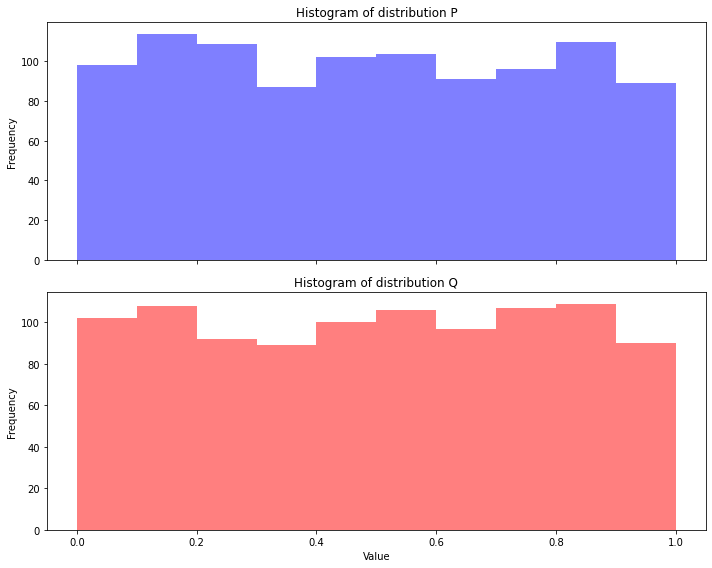

KL divergence: 0.0025721263213273854


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def kl_divergence(hist_p, hist_q):
    """
    Calculate the Kullback-Leibler divergence between two histograms (probability distributions).
    
    Arguments:
    hist_p -- numpy array, histogram for distribution P
    hist_q -- numpy array, histogram for distribution Q
    
    Returns:
    kl_div -- float, Kullback-Leibler divergence D(P||Q)
    """
    # Add a small value to histograms to avoid 0 values
    epsilon = 1e-10
    hist_p = hist_p.astype(float) + epsilon
    hist_q = hist_q.astype(float) + epsilon
    
    # Normalize histograms
    p = hist_p / np.sum(hist_p)
    q = hist_q / np.sum(hist_q)
    
    # Calculate KL divergence
    kl_div = np.sum(p * np.log(p / q))
    
    return kl_div

# Generate longer distributions P and Q
n = 1000  # Length of the distributions
P = np.random.rand(n)
Q = np.random.rand(n)

# Convert distributions to histograms
hist_P, bins_P = np.histogram(P, bins=10, range=(0,1))
hist_Q, bins_Q = np.histogram(Q, bins=10, range=(0,1))

# Create subplots
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 8))

# Plot histogram of distribution P
axs[0].hist(P, bins=bins_P, alpha=0.5, color='blue')
axs[0].set_title('Histogram of distribution P')
axs[0].set_ylabel('Frequency')

# Plot histogram of distribution Q
axs[1].hist(Q, bins=bins_Q, alpha=0.5, color='red')
axs[1].set_title('Histogram of distribution Q')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Value')

# Show the plots
plt.tight_layout()
plt.show()

# Calculate KL divergence
kl_divergence_result = kl_divergence(hist_P, hist_Q)
print("KL divergence:", kl_divergence_result)


実装テスト　DayPropとClass距離を定義→histgram→softmax正規化

In [19]:
import torch
import torch.nn.functional as F

#red, blue, yellow, orange
DayProp = [
    [1, 0, 0, 0],#day0
    [0, 0.5, 0.5, 0],#day3
    [0, 0.06, 0.28, 0.66],#day5
    [0.07, 0.04, 0.06, 0.83]#day7
]

def Class_Divergence(classA, classB):
    if(classA==classB):
        return 1
    
    if(classA==0):
        if(classB==1):
            return 2/3
        if(classB==2):
            return 0
        if(classB==3):
            return 1/3
    elif(classA==1):
        if(classB==0):
            return 2/3
        if(classB==2):
            return 0
        if(classB==3):
            return 1/3
    elif(classA==2):
        if(classB==0):
            return 2/3
        if(classB==1):
            return 0
        if(classB==3):
            return 1/3
    elif(classA==3):
        if(classB==0):
            return 1/3
        if(classB==1):
            return 1/3
        if(classB==2):
            return 1/3      

def DayCombo_to_HistogramData(dayA, dayB, datalen):
    data = torch.zeros(datalen)
    data_itr = 0
    for clsA, propA in enumerate(DayProp[dayA]):
        for clsB, propB in enumerate(DayProp[dayB]):
            add_data_num = int(propA * propB * 100)
            data[data_itr:add_data_num] = Class_Divergence(clsA, clsB)
            data_itr += add_data_num     
    return data

def jensen_shannon(p, q):
    # ジェンセン・シャノン情報量を計算する関数
    m = 0.5 * (p + q)
    return 0.5 * (F.kl_div(p, m) + F.kl_div(q, m))


tensor([62.,  0.,  0.,  0.,  0., 32.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,
         0.])
tensor([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0.,
         0.])
tensor(-0.0792)
tensor(-0.0795)


/a/yu-yamaoka/anaconda3/envs/cell/lib/python3.7/site-packages/torch/nn/functional.py:2887: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  "reduction: 'mean' divides the total loss by both the batch size and the support size."


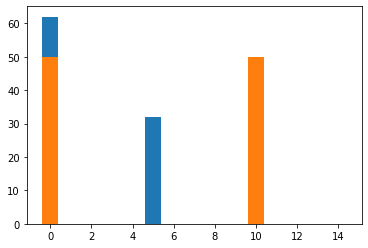

In [21]:
data = DayCombo_to_HistogramData(0, 2, 100)
data2 = DayCombo_to_HistogramData(0, 1, 100)
bins = 15

# ヒストグラムを計算
histogram = torch.histc(data, bins=bins, min=0, max=1)
histogram2 = torch.histc(data2, bins=bins, min=0, max=1)
#histogram2 = torch.tensor([0, 62, 32, 6, 0], dtype=torch.float32)

#ソフトマックスで正規化
prob_distribution = F.softmax(histogram, dim=0)
prob_distribution2 = F.softmax(histogram2, dim=0)

print(histogram)
print(histogram2)
print(jensen_shannon(prob_distribution, prob_distribution2))
print(F.kl_div(prob_distribution, prob_distribution2))

# ヒストグラムのプロット

# Plot histogram of distribution P
axs[0].hist(histogram, bins=bins_P, alpha=0.5, color='blue')
axs[0].set_title('Histogram of distribution P')
axs[0].set_ylabel('Frequency')

# Plot histogram of distribution Q
axs[1].hist(histogram2, bins=bins_Q, alpha=0.5, color='red')
axs[1].set_title('Histogram of distribution Q')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Value')

# Show the plots
plt.tight_layout()
plt.show()
plt.bar(range(len(histogram)), histogram)
plt.bar(range(len(histogram2)), histogram2)
plt.show()

tensor([-4.1963e-01, -7.9190e-01, -1.2811e-01,  1.1175e+00, -7.2507e-01,
        -2.0796e+00, -5.0374e-01,  2.7929e-01,  5.9301e-01,  1.1654e+00,
        -3.1191e-01,  7.5207e-01,  8.1579e-01,  2.6108e-02,  8.9769e-01,
         1.2951e+00,  6.2501e-01, -8.5883e-01, -8.1581e-01,  1.0857e+00,
        -1.1767e+00,  1.2605e+00,  8.4946e-01,  1.7434e+00, -1.9806e+00,
        -4.4083e-01, -8.1148e-03,  2.6323e+00, -2.2394e-01,  1.4562e+00,
         5.0728e-01, -8.5732e-01, -8.0442e-02,  7.7694e-01, -3.9847e-01,
        -2.2032e-01,  3.9695e-01, -1.2618e+00,  1.7593e-01, -1.0903e+00,
        -2.0019e+00, -2.3764e+00,  2.9209e-01,  8.3515e-01,  1.7275e+00,
        -2.8260e-01, -1.9600e+00, -3.8580e-01,  1.5378e+00, -3.8318e-01,
        -1.2300e+00,  4.8163e-01, -4.4775e-01,  2.3121e-01,  6.7986e-01,
        -5.8579e-01,  9.4502e-01, -1.4990e+00,  7.3704e-01,  3.5767e-01,
         7.6603e-01,  3.8512e-01, -6.6406e-01, -5.0587e-01,  9.1831e-01,
         3.4388e-01,  7.0760e-01,  5.2425e-01, -6.6

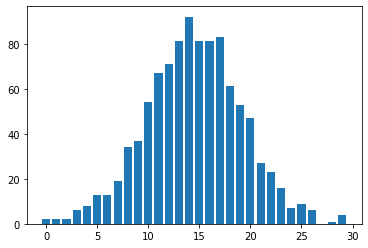

In [ ]:
import torch
import matplotlib.pyplot as plt

# テンソルを生成
data = torch.randn(1000)
print(data)

# ヒストグラムを計算
histogram = torch.histc(data, bins=30)

# ヒストグラムのプロット
plt.bar(range(len(histogram)), histogram)
plt.show()